# Taller trimming secuencias

## Mauricio Serna

### 22 de mayo 2018

In [68]:
# Librerías necesarias. 

from Bio import SeqIO
import numpy as np
import matplotlib.pyplot as plt

# 1. Importar los abi y extraer secuencias y phred values

In [69]:
# Importar abi
FWD = SeqIO.read('S107_27F.ab1', 'abi') 
REV = SeqIO.read('S107_907R.ab1', 'abi')

# Extraer los Phred values de cada uno de los abi
PhredFWD = FWD.letter_annotations['phred_quality']
PhredREV = REV.letter_annotations['phred_quality']

# Extraer las secuencias de cada uno de los abi
SeqFWD = FWD.seq
SeqREV = REV.seq

# 2. Trimar

## Para encontrar las posiciones de corte

In [70]:
# Promedios de los valores phred según rango (ventana) definido
def promediosporventana(phred, ventana):  # devuelve una lista con los promedios por el rango (ventana) indicada
    i = 0
    promedios = []
    while (i<len(phred)):
        promedios = promedios + [np.mean([phred[i:i+ventana]])]
        i = i + ventana
    return (promedios)

# Posiciones de trimaje
def primeraposicion (phred, ventana, umbral): # input: vector de phred, ventana de análisis ubral de phred=valores de phred deseados
    promedios = promediosporventana(phred, ventana) # calculo los promedios según la ventana deseada
    i = int(len(promedios)/2)  # comienzo a recorrer el vector desde la mitad
    while i >= 0:
        if promedios[i]<umbral and promedios[i-1]<umbral:
            posicion1 = i
            break
        i = i - 1 
    posicion1 = (posicion1+1)*ventana  # posición superior de la ventana que cumpla con la condición de dos ventanas con promedio inferior a 20
    return (posicion1)

def segundaposicion (phred, ventana, umbral):
    promedios = promediosporventana(phred, ventana) # calculo los promedios según la ventana deseada
    i = int(len(promedios)/2)  # comienzo a recorrer el vector desde la mitad
    while i < len(promedios):
        if promedios[i]<umbral and promedios[i+1]<umbral:
            posicion2 = i
            break
        i = i + 1 
    posicion = (posicion2)*ventana # posición inferior de la ventana que cumpla la condición de que dos ventanas sean menores a 20
    return(posicion)

def posiciones(phred, ventana, umbral):
    primera = primeraposicion(phred, ventana, umbral)
    segunda = segundaposicion(phred, ventana, umbral)
    return (primera,segunda)

## Para trimar

###  Secuencia

In [71]:
def trimming_seq(secuencia,phred,ventana,umbral):
    puntocorte_1= posiciones(phred, ventana,umbral)[0]
    puntocorte_2= posiciones(phred,ventana,umbral)[1]
    Seqtrimmed = secuencia[puntocorte_1:puntocorte_2]
    return (Seqtrimmed)

### Phred values

In [72]:
def trimming_phred(phred,ventana,umbral):
    puntocorte_1= posiciones(phred, ventana,umbral)[0]
    puntocorte_2= posiciones(phred,ventana,umbral)[1]
    Phredtrimmed = phred[puntocorte_1:puntocorte_2]
    return (Phredtrimmed)

## Graficar phred values

In [73]:
def graficar(phred):
    plt.plot(phred)
    plt.axis([0,len(phred),0,max(phred)+1])
    plt.xlabel('Posiciones', fontsize= 14)
    plt.ylabel('Phred values', fontsize= 14)
    plt.show()

# Ejemplo 1
## Secuencia FWD

Phred values de la secunecia FWD trimados


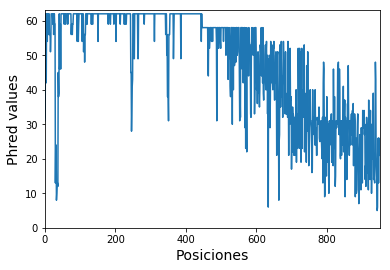

Phred values de la secuencia FWD sin trimar


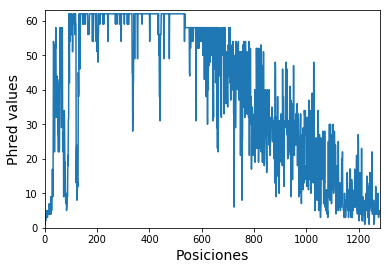

CGAACTGGTGAGTAACACGTGGGAAATCTGCCCAGAAGCAGGGGATAACACTTGGAAACAGGTGCTAATACCGTATAACAACAAAATCCGCATGGATTTTGTTTGAAAGGTGGCTTCGGCTATCACTTCTGGATGATCCCGCGGCGTATTAGTTAGTTGGTGAGGTAAAGGCCCACCAAGACGATGATACGTAGCCGACCTGAGAGGGTAATCGGCCACATTGGGACTGAGACACGGCCCAAACTCCTACGGGAGGCAGCAGTAGGGAATCTTCCACAATGGACGAAAGTCTGATGGAGCAATGCCGCGTGAGTGAAGAAGGGTTTCGGCTCGTAAAACTCTGTTGTTAAAGAAGAACACCTTTGAGAGTAACTGTTCAAGGGTTGACGGTATTTAACCAGAAAGCCACGGCTAACTACGTGCCAGCAGCCGCGGTAATACGTAGGTGGCAAGCGTTGTCCGGATTTATTGGGCGTAAAGCGAGCGCAGGCGGTTTTTTAAGTCTGATGTGAAAGCCTTCGGCTTAACCGGAGAAGTGCATCGGAAACTGGGAGACTTGAGTGCAGAAGAGGACAGTGGAACTCCATGTGTAGCGGTGGAATGCGTAGATATATGGAAGAACACCAGTGGCGAAGGCGGCTGTCTAGTCTGTAACTGACGCTGAGGCTCGAAAGCATGGGTAGCGAACAGGATTAGATACCCTGGTAGTCCATGCCGTAAACGATGAGTGCTAAGTGTTGGAGGGTTTCCGCCCTTCAGTGCTGCAGCTAACGCATTAAGCACTCCGCCTGGGGAGTACGACCGCAAGGTTGAAACTCAAAGGAATTGACGGGGGCCCGCACAAGCGGTGGAGCATGTGGTTTAATTCGAAGCTACGCGAAGAACCTTACCAGGTCTTGACATCTTCTGCCAATCTTAGAGATAAGACGTTCCCTTCGGGGACAGAATGA
El tañano de la secuencia sin trimar es 1280
El t

In [74]:
# Importar abi
FWD = SeqIO.read('S107_27F.ab1', 'abi') 
REV = SeqIO.read('S107_907R.ab1', 'abi')

# Extraer los Phred values de cada uno de los abi
PhredFWD = FWD.letter_annotations['phred_quality']
PhredREV = REV.letter_annotations['phred_quality']

# Extraer las secuencias de cada uno de los abi
SeqFWD = FWD.seq
SeqREV = REV.seq

PhredFWDtrimmed= trimming_phred(PhredFWD,5,20)
SeqFWDtrimmed = trimming_seq(SeqFWD,PhredFWD,5,20)

print('Phred values de la secunecia FWD trimados')
graficar(PhredFWDtrimmed)
print('Phred values de la secuencia FWD sin trimar')
graficar(PhredFWD)
print(SeqFWDtrimmed)
print ('El tañano de la secuencia sin trimar es %i' %(len(SeqFWD))) 
print ('El tamaño de la secuencia trimada es de %i' %(len(SeqFWDtrimmed)))

## Secuencia REV

Phred values de la secunecia FWD trimados


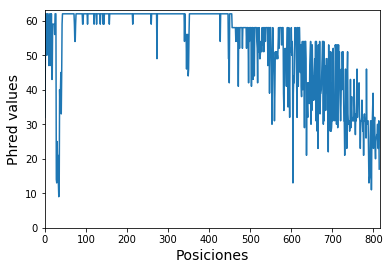

Phred values de la secuencia FWD sin trimar


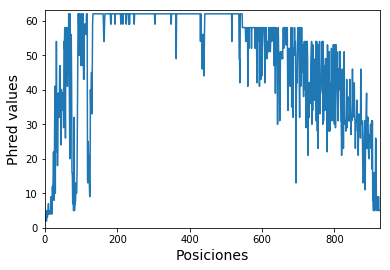

La secuencia trimada es
ACGGCATGGACTACCAGGGTATCTAATCCTGTTCGCTACCCATGCTTTCGAGCCTCAGCGTCAGTTACAGACTAGACAGCCGCCTTCGCCACTGGTGTTCTTCCATATATCTACGCATTCCACCGCTACACATGGAGTTCCACTGTCCTCTTCTGCACTCAAGTCTCCCAGTTTCCGATGCACTTCTCCGGTTAAGCCGAAGGCTTTCACATCAGACTTAAAAAACCGCCTGCGCTCGCTTTACGCCCAATAAATCCGGACAACGCTTGCCACCTACGTATTACCGCGGCTGCTGGCACGTAGTTAGCCGTGGCTTTCTGGTTAAATACCGTCAACCCTTGAACAGTTACTCTCAAAGGTGTTCTTCTTTAACAACAGAGTTTTACGAGCCGAAACCCTTCTTCACTCACGCGGCATTGCTCCATCAGACTTTCGTCCATTGTGGAAGATTCCCTACTGCTGCCTCCCGTAGGAGTTTGGGCCGTGTCTCAGTCCCAATGTGGCCGATTACCCTCTCAGGTCGGCTACGTATCATCGTCTTGGTGGGCCTTTACCTCACCAACTAACTAATACGCCGCGGGATCATCCAGAAGTGATAGCCGAAGCCACCTTTCAAACAAAATCCATGCGGATTTTGTTGTTATACGGTATTAGCACCTGTTTCCAAGTGTTATCCCCTGCTTCTGGGCAGATTTCCCACGTGTTACTCACCAGTTCGCCACTCGCTTCATTGTTGAAATCAGTGCAAGCACGTCATTCAACGGAAGCTCGTTCGACTTGCATGTATTAGGCATGCCGCCAGCGTTCGTCCTGAG


In [75]:
PhredREVtrimmed= trimming_phred(PhredREV,5,20)
SeqREVtrimmed = trimming_seq(SeqREV,PhredREV,5,20)

print('Phred values de la secunecia FWD trimados')
graficar(PhredREVtrimmed)
print('Phred values de la secuencia FWD sin trimar')
graficar(PhredREV)
print('La secuencia trimada es')
print(SeqREVtrimmed)

# Ejemplo 2.
## Compración con triamaje en Genieous - muestra de Chocó 

Phred values de la secunecia FWD trimados


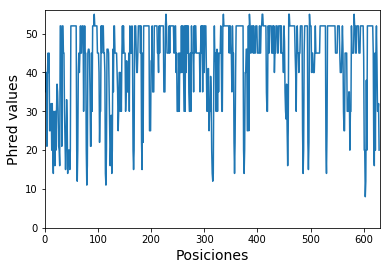

Phred values de la secuencia FWD sin trimar


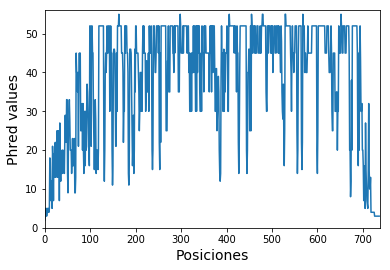

In [76]:
# Importar abi
FWDchoco = SeqIO.read('CH7-24_M13F.ab1', 'abi') 

# Extraer los Phred values de cada uno de los abi
PhredFWDchoco = FWDchoco.letter_annotations['phred_quality']

# Extraer las secuencias de cada uno de los abi
SeqFWDchoco = FWDchoco.seq

PhredFWDchocotrimmed= trimming_phred(PhredFWDchoco,5,20)
SeqFWDchocotrimmed = trimming_seq(SeqFWDchoco,PhredFWDchoco,5,20)

print('Phred values de la secunecia FWD trimados')
graficar(PhredFWDchocotrimmed)
print('Phred values de la secuencia FWD sin trimar')
graficar(PhredFWDchoco)

In [77]:
print('La secuencia trimada es:')
print(SeqFWDchocotrimmed)

La secuencia trimada es:
TCCTTATTCGTGCAAAACTTGGTCAACCTGGGGCCCTATTAGGTGACGATCAAATCTATAATGTAATCGTAACAGCCCATGCTTTCGTAATAATTTTCTTTATAGTAATACCTATTATAATTGGAGGATTCGGTAATTGACTAGTACCTCTAATAATTGGCGCACCCGATATAGCATTCCCACGAATAAATAATATAAGCTTCTGACTTCTCCCACCTTCCTTCCTACTTTTACTTGCTTCCTCTACAGTTGAAGCTGGCGTTGGAACAGGTTGAACCGTATACCCACCACTAGCCGGAAATCTAGCACATGCCGGAGCTTCAGTTGATCTGGCTATTTTCTCTCTTCACCTAGCCGGAGTTTCATCAATTCTCGGAGCTATTAATTTTATTACTACAATTATTAATATAAAACCACCTGCCCTTTCTCAATATCAAACACCTTTATTTGTTTGATCTGTTTTAATTACCGCCGTCCTATTACTCCTGTCCCTTCCTGTTTTAGCAGCAGGTATTACTATACTCCTAACAGACCGAAATCTTAATACCACATTCTTTGACCCAGCTGGAGGAGGAGACCCTATTTTATATCAGCACTTATTCGGCTTCTTCGGCCACCCAGAAGTCTAGG


### Comparación con trimaje de Geneious
#### Barras pertenecen a los phred values, línea gris es la secuencia

![y](Comparacion_Choco_geneious-algoritmo.png)

# Ejemplo 3. 
## Comparación con trimaje de Geneious - muestra Caucasia

Phred values de la secunecia REV trimados


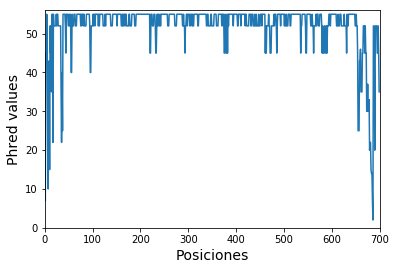

700
Phred values de la secuencia REV sin trimar


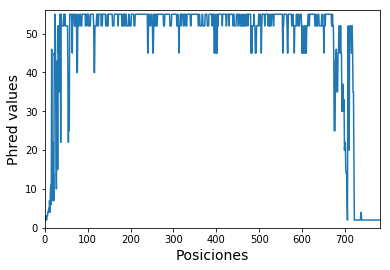

In [78]:
# Importar abi
REVcande = SeqIO.read('JFD_1312_M13REV.ab1', 'abi') 

# Extraer los Phred values de cada uno de los abi
PhredREVcande = REVcande.letter_annotations['phred_quality']

# Extraer las secuencias de cada uno de los abi
SeqREVcande = REVcande.seq

PhredREVcandetrimmed= trimming_phred(PhredREVcande,5,20)
SeqREVcandetrimmed = trimming_seq(SeqREVcande,PhredREVcande,5,20)

print('Phred values de la secunecia REV trimados')
graficar(PhredREVcandetrimmed)
print(len(PhredREVcandetrimmed))
print('Phred values de la secuencia REV sin trimar')
graficar(PhredREVcande)

### Comparación con trimaje de Geneious
#### Barras pertenecen a los phred values, línea gris es la secuencia

![y](Comparacion_Candelaria_geneious-algoritmo.png)